In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Importing the dataset
df = pd.read_csv('C:/Users/Randy/Documents/VS MEdia/OMB-LO-USER2.csv')
df.head()

,id,browserHeight,browserWidth,customData,dateCreated,devicetype.browserFull,devicetype.browserName,devicetype.deviceType,devicetype.osFull,devicetype.osName,geoip.city,geoip.continentCode,geoip.continentName,geoip.countryIso,geoip.countryName,geoip.location.lat,geoip.location.lon,geoip.regionCode,geoip.regionName,geoip.timezone,ip,isUnique,isp.organization,lastUrl,locale,referrer.domain,referrer.known,referrer.medium,referrer.source,referrer.term,referrer.uri,referrer.utmCampaign,referrer.utmMedium,referrer.utmSource,referrer.utmTerm,siteId,starred,tags,time,totalActivity,totalPages,totalVisits,type,typed,url,userAgent,viewHeight,viewWidth
0,151572-1559250870660-6dbe693ff01b6bca,1145,1551,NaN,2019-05-30T21:14:30.692Z,Chrome 74,Chrome,desktop,Mac OS 10.14.1,Mac OS,La Mirada,NaN,North America,US,United States,33.9073,-118.0087,CA,California,America/Los_Angeles,4.35.153.192,0,Level 3 Communications,https://www.ohmybutt.com/entrance/LP-01.php,en-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,376.0,9,1,13,enhanced,N,https://www.ohmybutt.com/entrance/LP-01.php,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,1145,1551
1,151572-1559253433859-a9b02d17f62c8f56,1145,1551,{},2019-05-30T21:57:13.863Z,Chrome 74,Chrome,desktop,Mac OS 10.14.1,Mac OS,La Mirada,NaN,North America,US,United States,33.9073,-118.0087,CA,California,America/Los_Angeles,4.35.153.192,0,Level 3 Communications,https://www.ohmybutt.com/entrance/LP-01.php,en-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,9.0,8,1,14,enhanced,N,https://www.ohmybutt.com/entrance/LP-01.php,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,1145,1551
2,151572-1559255033266-2ccc3997f2f89eb8,673,1024,NaN,2019-05-30T22:23:53.573Z,IE 11,IE,desktop,Windows 10,Windows,NaN,NaN,North America,US,United States,37.7510,-97.8220,NaN,NaN,America/Chicago,66.102.8.93,1,Google,https://gtm-msr.appspot.com/render2?id=GTM-P57...,en-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,1,1,enhanced,N,https://gtm-msr.appspot.com/render2?id=GTM-P57...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; Trid...,673,1024
3,151572-1559257236627-815950c19073cb3e,1145,1551,{},2019-05-30T23:00:36.631Z,Chrome 74,Chrome,desktop,Mac OS 10.14.1,Mac OS,La Mirada,NaN,North America,US,United States,33.9073,-118.0087,CA,California,America/Los_Angeles,4.35.153.192,0,Level 3 Communications,https://www.ohmybutt.com/entrance/LP-01.php,en-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6.0,1,1,15,enhanced,N,https://www.ohmybutt.com/entrance/LP-01.php,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,1145,1551
4,151572-1559259585087-e33c55a86630a877,1145,1551,{},2019-05-30T23:39:45.090Z,Chrome 74,Chrome,desktop,Mac OS 10.14.1,Mac OS,La Mirada,NaN,North America,US,United States,33.9073,-118.0087,CA,California,America/Los_Angeles,4.35.153.192,0,Level 3 Communications,https://www.ohmybutt.com/entrance/LP-01.php,en-US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6.0,2,1,16,enhanced,N,https://www.ohmybutt.com/entrance/LP-01.php,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,1145,1551


In [44]:
df['LP'] = np.where(df.url.str.contains('LP-01'), 'LP1',
                       np.where(df.url.str.contains('LP-02'),'LP2',
                       np.where(df.url.str.contains('LP-03'),'LP3',
                       'NA')))

In [45]:
df.LP.value_counts()

LP2    3438
LP1    2074
LP3    1663
NA       83
Name: LP, dtype: int64

# Random Forest Modeling

In [3]:
new_df = df[['devicetype.browserName', 'devicetype.deviceType', 'devicetype.osName', 'geoip.regionCode',  'isp.organization', 'time', 'totalActivity', 'totalPages', 'totalVisits', 'typed']]
new_df = new_df.replace({'Null':np.nan}).dropna()
new_df.head()

,devicetype.browserName,devicetype.deviceType,devicetype.osName,geoip.regionCode,isp.organization,time,totalActivity,totalPages,totalVisits,typed
0,Chrome,desktop,Mac OS,CA,Level 3 Communications,376.0,9,1,13,N
1,Chrome,desktop,Mac OS,CA,Level 3 Communications,9.0,8,1,14,N
3,Chrome,desktop,Mac OS,CA,Level 3 Communications,6.0,1,1,15,N
4,Chrome,desktop,Mac OS,CA,Level 3 Communications,6.0,2,1,16,N
5,Chrome,desktop,Mac OS,CA,Level 3 Communications,48.0,7,1,17,N


In [4]:
X = new_df
y = X.pop("typed")

In [5]:
# Define categorical features
categorical_variables = ['devicetype.browserName', 'devicetype.deviceType', 'devicetype.osName', 'geoip.regionCode',  'isp.organization']

# Impute missing categorical variables and dummify them
for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler

# Create the baseline 
model_1 = RandomForestClassifier(oob_score=True, random_state=42)

# Fit and Evaluate OOB
model_1 = model_1.fit(X, y)

# Calculate OOB Score
print("The OOB Score is: " + str(model_1.oob_score_))

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The OOB Score is: 0.9642079806529625


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# User Registration Time By Landing Pages

- Sample size of 147
- LP2 takes the user the quickest to register
- LP3 takes the users the longest to register

In [61]:
dfnew.shape

(147, 49)

In [60]:
dfnew.LP.value_counts()

LP2    82
LP1    39
LP3    24
NA      2
Name: LP, dtype: int64

C:\Users\Randy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'User Registration Time By Landing Pages')

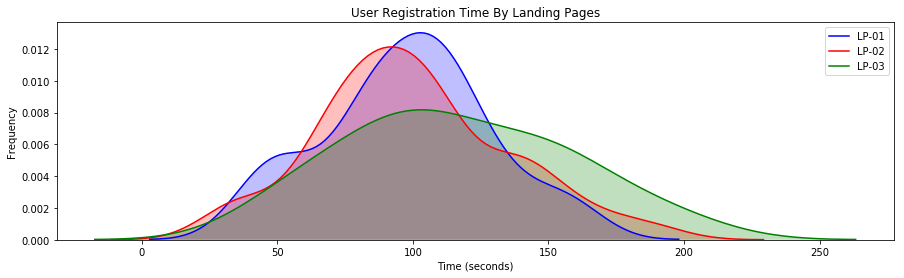

In [58]:
dfnew = df[df.time < 200]
#dfnew = dfnew[dfnew.totalActivity < 200]
dfnew = dfnew[dfnew.typed == 'Y']

# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(dfnew.loc[(dfnew['LP'] == 'LP1'),'time'] , color='b',shade=True,label='LP-01')
ax=sns.kdeplot(dfnew.loc[(dfnew['LP'] == 'LP2'),'time'] , color='r',shade=True,label='LP-02')
ax=sns.kdeplot(dfnew.loc[(dfnew['LP'] == 'LP3'),'time'] , color='g',shade=True,label='LP-03')
ax.set(xlabel='Time (seconds)', ylabel='Frequency')
plt.title('User Registration Time By Landing Pages')

# User Registration Time By Browser

- Sample size of 147
- LP2 takes the user the quickest to register
- LP3 takes the users the longest to register

C:\Users\Randy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'User Registration Time By Landing Pages')

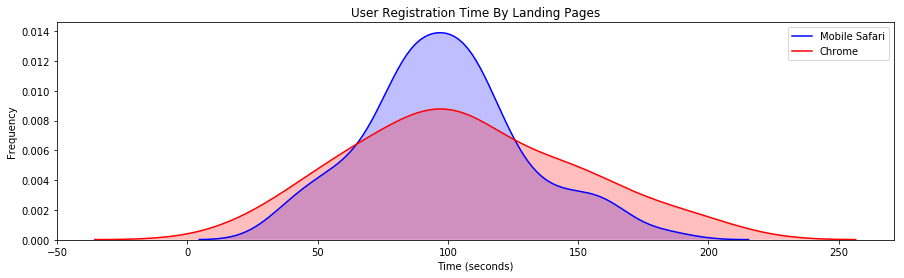

In [66]:
dfnew = df[df.time < 200]
#dfnew = dfnew[dfnew.totalActivity < 200]
dfnew = dfnew[dfnew.typed == 'Y']

# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.browserName'] == 'Mobile Safari'),'time'] , color='b',shade=True,label='Mobile Safari')
ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.browserName'] == 'Chrome'),'time'] , color='r',shade=True,label='Chrome')
#ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.browserName'] == 'IE'),'time'] , color='g',shade=True,label='IE')
ax.set(xlabel='Time (seconds)', ylabel='Frequency')
plt.title('User Registration Time By Landing Pages')

C:\Users\Randy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'User Registration Time By Landing Pages')

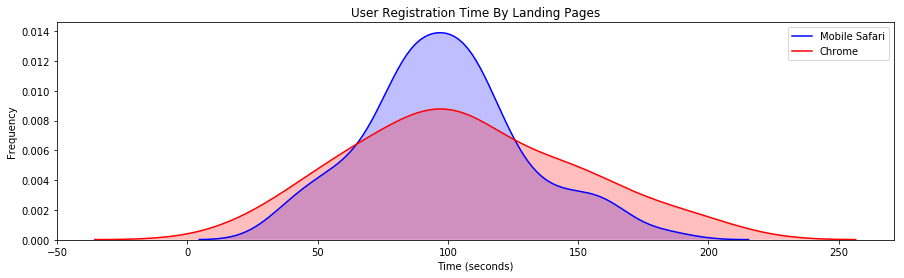

In [68]:
dfnew = df[df.time < 200]
#dfnew = dfnew[dfnew.totalActivity < 200]
dfnew = dfnew[dfnew.typed == 'Y']

# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.browserName'] == 'Mobile Safari'),'time'] , color='b',shade=True,label='Mobile Safari')
ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.browserName'] == 'Chrome'),'time'] , color='r',shade=True,label='Chrome')
#ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.browserName'] == 'IE'),'time'] , color='g',shade=True,label='IE')
ax.set(xlabel='Time (seconds)', ylabel='Frequency')
plt.title('User Registration Time By Landing Pages')

C:\Users\Randy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'User Registration Time By Landing Pages')

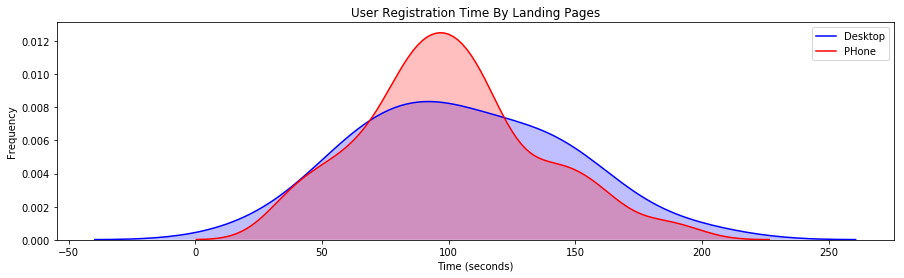

In [72]:
dfnew = df[df.time < 200]
#dfnew = dfnew[dfnew.totalActivity < 200]
dfnew = dfnew[dfnew.typed == 'Y']

# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.deviceType'] == 'desktop'),'time'] , color='b',shade=True,label='Desktop')
ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.deviceType'] == 'phone'),'time'] , color='r',shade=True,label='PHone')
#ax=sns.kdeplot(dfnew.loc[(dfnew['devicetype.browserName'] == 'IE'),'time'] , color='g',shade=True,label='IE')
ax.set(xlabel='Time (seconds)', ylabel='Frequency')
plt.title('User Registration Time By Landing Pages')


# User Activity By Registration & Bounce

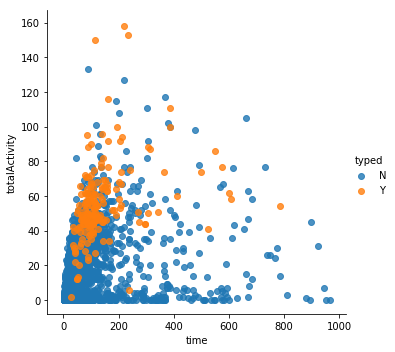

In [10]:
dfnew = df[df.time < 1000]
dfnew = dfnew[dfnew.totalActivity < 200]

sns.lmplot(x='time', y='totalActivity', data=dfnew,
           fit_reg=False, # No regression line
           hue='typed')   # Color by evolution stag

# User Activity By Device
***

### Bouncing Users

In [40]:
dfnew['devicetype.deviceType'].value_counts()

phone      3344
desktop     948
tablet       23
Name: devicetype.deviceType, dtype: int64

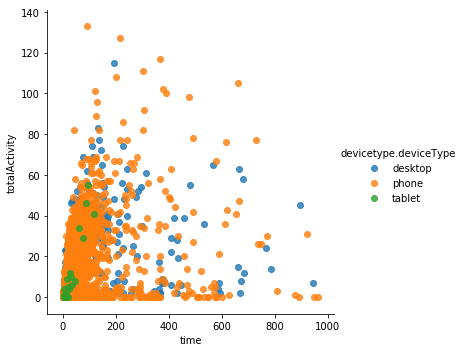

In [39]:

dfnew = df[df.typed == 'N']
dfnew = dfnew[dfnew.time < 1000]
dfnew = dfnew[dfnew.totalActivity < 200]

sns.lmplot(x='time', y='totalActivity', data=dfnew,
           fit_reg=False, # No regression line
           hue='devicetype.deviceType')   # Color by evolution stag

### Bouncing Users by Device Type

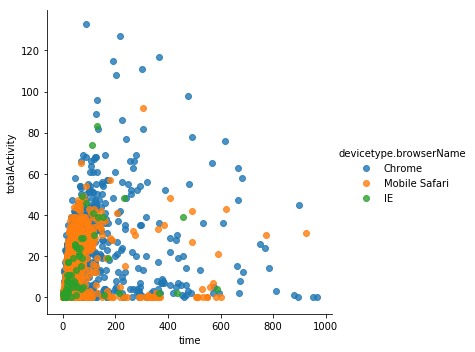

In [35]:

dfnew = df[df.typed == 'N']
dfnew = dfnew[dfnew.time < 1000]
dfnew = dfnew[dfnew.totalActivity < 200]
dfnew = dfnew[dfnew['devicetype.browserName'].isin(['Chrome','Mobile Safari', 'IE'])]

sns.lmplot(x='time', y='totalActivity', data=dfnew,
           fit_reg=False, # No regression line
           hue='devicetype.browserName')   # Color by evolution stag

### Registered Users

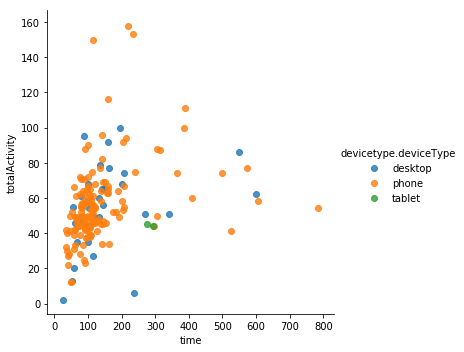

In [19]:
dfnew = df[df.typed == 'Y']
dfnew = dfnew[dfnew.time < 1000]
dfnew = dfnew[dfnew.totalActivity < 200]

sns.lmplot(x='time', y='totalActivity', data=dfnew,
           fit_reg=False, # No regression line
           hue='devicetype.deviceType')   # Color by evolution stag

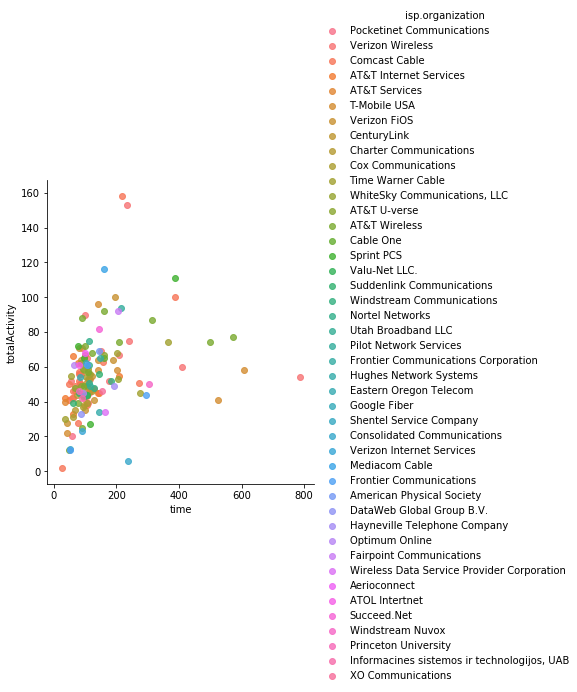

In [37]:

dfnew = df[df.typed == 'Y']
dfnew = dfnew[dfnew.time < 1000]
dfnew = dfnew[dfnew.totalActivity < 200]
dfnew = dfnew[dfnew['devicetype.browserName'].isin(['Chrome','Mobile Safari','IE'])]

sns.lmplot(x='time', y='totalActivity', data=dfnew,
           fit_reg=False, # No regression line
           hue='isp.organization')   # Color by evolution stag

In [ ]:
feature_importances = pd.Series(model_1.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1.577782e-01
totalActivity                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

totalVisits               0.012261
devicetype.deviceType     0.014316
devicetype.osName         0.038724
devicetype.browserName    0.054543
totalPages                0.080275
time                      0.140772
geoip.regionCode          0.165353
isp.organization          0.177222
totalActivity             0.316534
dtype: float64


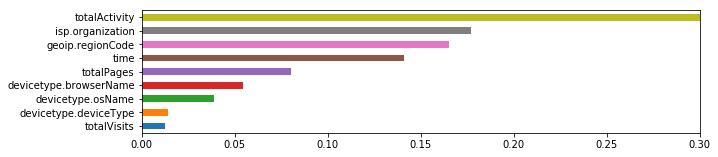

In [8]:
# Create function to combine feature importances
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.1, width=10, summarized_columns=None):  
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    results = pd.Series(feature_dict, index=feature_dict.keys())
    results.sort_values(inplace=True)
    print(results)
    results.plot(kind='barh', figsize=(width, len(results)/4), xlim=(0, .30))
 
# Create combined feature importances
graph_feature_importances(model_1, X.columns, summarized_columns=categorical_variables)

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


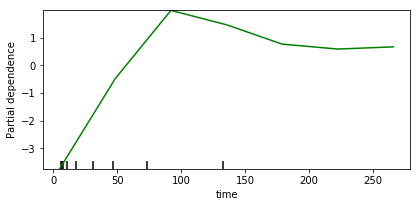

In [16]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

clf = GradientBoostingClassifier()
titanic_X_colns = ['time']
titanic_X = X_train[titanic_X_colns]
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)

clf.fit(imputed_titanic_X, y_train)
titanic_plots = plot_partial_dependence(clf, features=['time'], X=titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=7)

In [19]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model_1, dataset=X_train, model_features=X_train.columns, feature='time')

# plot it
pdp.pdp_plot(pdp_goals, 'time')
plt.show()

ModuleNotFoundError: No module named 'pdpbox'

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


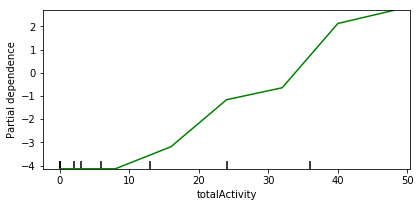

In [14]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

clf = GradientBoostingClassifier()
titanic_X_colns = ['totalActivity']
titanic_X = X_train[titanic_X_colns]
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)

clf.fit(imputed_titanic_X, y_train)
titanic_plots = plot_partial_dependence(clf, features=['totalActivity'], X=titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=7)

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


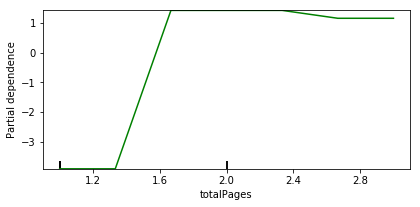

In [17]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

clf = GradientBoostingClassifier()
titanic_X_colns = ['totalPages']
titanic_X = X_train[titanic_X_colns]
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)

clf.fit(imputed_titanic_X, y_train)
titanic_plots = plot_partial_dependence(clf, features=['totalPages'], X=titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=7)

In [11]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus


m = RandomForestClassifier(n_estimators=1, max_depth=3)
m = m.fit(X_train, y_train)
# Create DOT data
dot_data = tree.export_graphviz(m.estimators_[0], out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [50]:
df.typed.value_counts()/len(df)

N    0.974786
Y    0.025214
Name: typed, dtype: float64

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

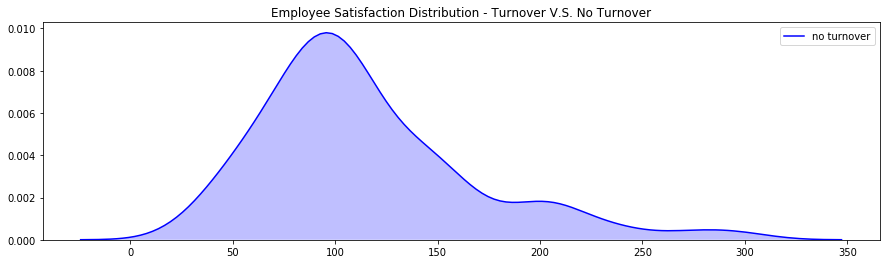

In [51]:
#KDEPlot: Kernel Density Estimate Plot
df1 = df[df.totalVisits == 1]
fig = plt.figure(figsize=(15,4))
time = df1[df1.time < 300]
ax=sns.kdeplot(time.loc[(time['typed'] == 'Y'),'time'] , color='b',shade=True, label='no turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

In [74]:
pl1.typed.value_counts()

N    4
Y    1
Name: typed, dtype: int64

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

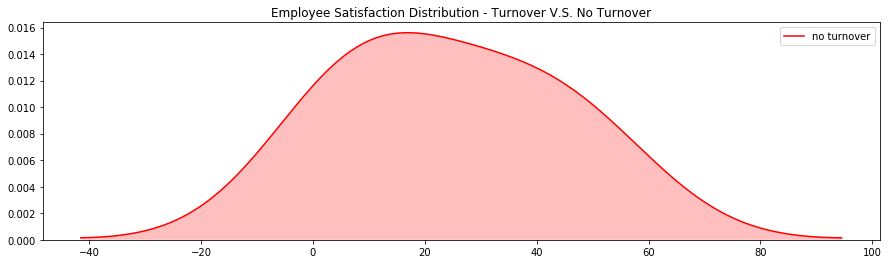

In [80]:
pl1 = df[df.tags=='#reglander']
#pl1 = pl[pl.totalVisits == 2]
fig = plt.figure(figsize=(15,4))
pltime = pl1[pl1.time < 150]
ax=sns.kdeplot(pltime.time , color='r',shade=True, label='no turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

# No Registration (Prelander)

Users take mostly 10 seconds to bounce out of the prelander

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

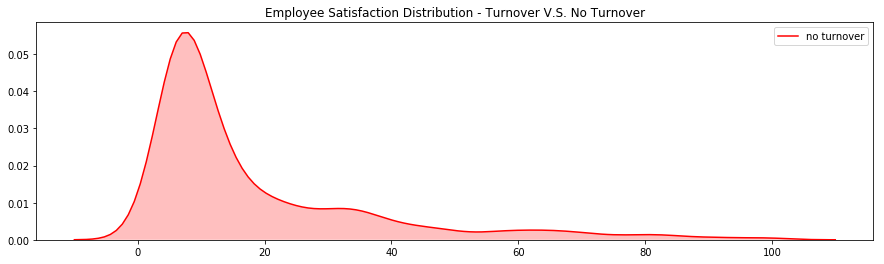

In [64]:
pl = df[df.tags=='#prelander']
pl1 = pl[pl.totalVisits == 1]
fig = plt.figure(figsize=(15,4))
pltime = pl1[pl1.time < 100]
ax=sns.kdeplot(pltime.loc[(time['typed'] == 'N'),'time'] , color='r',shade=True, label='no turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')